In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
import os
import math
from sklearn import linear_model
from matplotlib import animation

In [2]:
file = os.path.join(os.getcwd(), '../ballpositions.csv')

# Load data into array
print('load into array...')
data = []
with open(file, 'r') as f:
    for i, row in enumerate(f):
        data = data + [row]
        
path = '/home/mueller/code/python/Anwendungspraktikum/Videos/GoPro/GoProFrames/3_image_GP_00002.png'
image = plt.imread(path)
print(image.shape)

load into array...
(1080, 1920, 3)


In [3]:
ballpos = np.array([])
for i in range(4757, len(data)):
    row = data[i]
    row = row.replace('    ', ' ')
    row = row.replace('   ', ' ')
    row = row.replace('  ', ' ')
    path, bb, ac, lb, mx = row.split(';')
    b1, b2, b3, b4 = [x.strip('[]') for x in bb.split(' ')[0:4]]
    b1, b3 = float(b1) * image.shape[0], float(b3) * image.shape[0]
    b2, b4 = float(b2) * image.shape[1], float(b4) * image.shape[1]
    accuracy = float(ac.split(' ')[0].strip('[]'))
    ballpos = np.append(ballpos, [i, (b2+b4)/2, (b1+b3)/2, accuracy])
    
ballpos = ballpos.reshape(-1,4)
ballpos[0:10]

array([[4.75700000e+03, 1.37297530e+03, 4.51113743e+02, 3.28167000e-03],
       [4.75800000e+03, 1.05015210e+03, 4.66790499e+02, 1.65076700e-02],
       [4.75900000e+03, 1.06544690e+03, 4.50933901e+02, 3.16457000e-03],
       [4.76000000e+03, 1.05251816e+03, 4.63950504e+02, 1.40385500e-02],
       [4.76100000e+03, 1.05125712e+03, 4.62206185e+02, 1.43465200e-02],
       [4.76200000e+03, 1.05313555e+03, 4.64493766e+02, 1.81360800e-02],
       [4.76300000e+03, 1.04899395e+03, 4.60036373e+02, 1.60507500e-02],
       [4.76400000e+03, 1.08442475e+03, 6.05295666e+02, 1.22599000e-02],
       [4.76500000e+03, 1.09017483e+03, 5.67845192e+02, 8.05669000e-03],
       [4.76600000e+03, 1.09038211e+03, 5.68410944e+02, 8.67592000e-03]])

In [37]:
ballpos[306:320]

array([[5.06300000e+03, 9.50372995e+02, 8.26598644e+02, 3.65758000e-03],
       [5.06400000e+03, 9.50375059e+02, 8.26650927e+02, 3.63124000e-03],
       [5.06500000e+03, 9.50480179e+02, 8.26548894e+02, 3.24978000e-03],
       [5.06600000e+03, 9.50424557e+02, 8.26400605e+02, 2.99112000e-03],
       [5.06700000e+03, 8.79839184e+02, 2.00018295e+02, 4.49292000e-03],
       [5.06800000e+03, 9.50416435e+02, 8.26363242e+02, 2.95447000e-03],
       [5.06900000e+03, 9.50395373e+02, 8.26362270e+02, 3.00995000e-03],
       [5.07000000e+03, 9.50397475e+02, 8.26323066e+02, 2.78598000e-03],
       [5.07100000e+03, 9.50336218e+02, 8.26371666e+02, 2.95613000e-03],
       [5.07200000e+03, 9.50375405e+02, 8.26228706e+02, 2.75711000e-03],
       [5.07300000e+03, 3.45575837e+02, 4.58445458e+02, 3.82098000e-03],
       [5.07400000e+03, 9.50344675e+02, 8.26175101e+02, 2.98907000e-03],
       [5.07500000e+03, 9.50329690e+02, 8.26172298e+02, 2.89424000e-03],
       [5.07600000e+03, 9.50364941e+02, 8.26223161e

In [48]:
cpreg[450:500]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

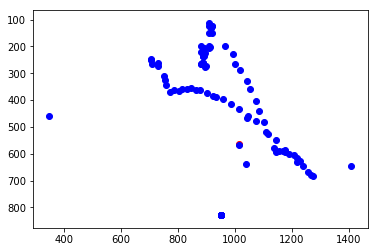

In [41]:
fig = plt.figure()
for i, row in enumerate(ballpos[300:450]):
    if row[3] > 0.00000000008:
        if i > 0:
            plt.scatter(row[1], row[2], c='b')
        else:
            plt.scatter(row[1], row[2], c='r')
plt.gca().invert_yaxis()
plt.show()

<IPython.core.display.Javascript object>


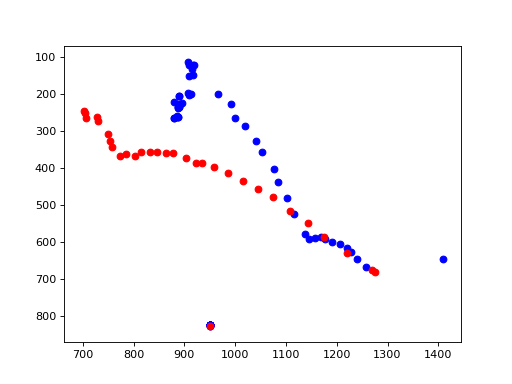

In [94]:
fig = plt.figure()
for i, row in enumerate(ballpos[350:450]):
    if row[3] > 0.00000000008:
        if i < 69:
            plt.scatter(row[1], row[2], c='b')
        else:
            plt.scatter(row[1], row[2], c='r')
plt.gca().invert_yaxis()
plt.show()

416
417
418
419
420
421
422


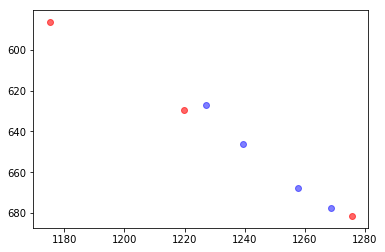

In [4]:
fig = plt.figure()
for i, row in enumerate(ballpos[416:423]):
    if row[3] > 0.0000000008:
        print(i+416)
        if i < 4:
            plt.scatter(row[1], row[2], c='b', alpha=0.5)
        else:
            plt.scatter(row[1], row[2], c='r', alpha=0.6)
plt.gca().invert_yaxis()
plt.show()

In [54]:
cpreg[0]

0.0

In [15]:
p1 = [6.899904, 3.982122]
p2 = [-55.6548, -51.873426]
alphaRad = math.acos(np.dot(p1,p2)/ (np.linalg.norm(p1) * np.linalg.norm(p2)))
alpha = math.degrees(alphaRad)
print(alpha)
angular(p1,p2)

167.00446447726574


12.995535522734261

In [50]:
cpreg[418:420]

array([0., 0.])

In [38]:
#calculate line through two points
def l(p1,p2):
    return p2-p1

def reg(points):
    reg = linear_model.LinearRegression(fit_intercept=True)
    reg.fit(points[:,0].reshape(-1,1), points[:,1].reshape(-1,1))
    return reg.coef_, reg.intercept_ 

#calulate angular between two lines
def angular(r1, r2): # r1, r2 direction vectors of line
    try:
        alphaRad = math.acos(np.dot(r1, r2) / (np.linalg.norm(r1) * np.linalg.norm(r2)))
        alpha = math.degrees(alphaRad)
        return alpha
    #In case lines are (almost) parallel
    except ValueError:
        return 0

In [55]:
#cp points with just two 
cp = np.zeros(len(ballpos))
for i in range(len(ballpos)-2):
    if np.any(l(ballpos[i,1:3], ballpos[i+1,1:3])) > 0 and np.any(l(ballpos[i+1,1:3], ballpos[i+2,1:3])) > 0: #make sure not to divide by zero
        print(np.dot(r1, r2))
        alpha = angular(l(ballpos[i,1:3], ballpos[i+1,1:3]), l(ballpos[i+1,1:3], ballpos[i+2,1:3]))
        cp[i+1] = alpha

NameError: name 'r1' is not defined

In [135]:
backup = ballpos

In [129]:
ballpos[np.where(ballpos[:,1] > 0.03)]

array([[4.75700000e+03, 1.37297530e+03, 4.51113743e+02, 3.28167000e-03],
       [4.75800000e+03, 1.05015210e+03, 4.66790499e+02, 1.65076700e-02],
       [4.75900000e+03, 1.06544690e+03, 4.50933901e+02, 3.16457000e-03],
       [4.76000000e+03, 1.05251816e+03, 4.63950504e+02, 1.40385500e-02],
       [4.76100000e+03, 1.05125712e+03, 4.62206185e+02, 1.43465200e-02],
       [4.76200000e+03, 1.05313555e+03, 4.64493766e+02, 1.81360800e-02],
       [4.76300000e+03, 1.04899395e+03, 4.60036373e+02, 1.60507500e-02],
       [4.76400000e+03, 1.08442475e+03, 6.05295666e+02, 1.22599000e-02],
       [4.76500000e+03, 1.09017483e+03, 5.67845192e+02, 8.05669000e-03],
       [4.76600000e+03, 1.09038211e+03, 5.68410944e+02, 8.67592000e-03]])

In [158]:
cpreg = np.zeros(len(ballpos))
ang = np.zeros(len(ballpos))
#plt.figure()
nump = 2
for i in range(0,len(ballpos-nump)-nump,1):
    #plt.plot(ballpos[i:i+nump, 1], ballpos[i:i+nump, 2], 'bo', alpha=0.5)
    #plt.plot(ballpos[i+1:i+nump+1, 1], ballpos[i+1:i+nump+1, 2], 'ro', alpha=0.5)
    slo1, int1 = reg(ballpos[i:i+nump, 1:3])
    slo2, int2 = reg(ballpos[i+1:i+nump+1, 1:3])
    x1, x2 = 1, 1
    #Check orientation, since slope must be negativ if x and y < 0
    val1 = ballpos[i+nump-1,1:3] - ballpos[i,1:3]
    if val1[0] < 0 and val1[1] < 0:
        slo1[0, 0] *= -1
        x1 = -1
    if val[0] < 0 and val[1] > 0:
        slo1[0, 0] *= -1
        x1= -1

    val2 = ballpos[i+nump,1:3] - ballpos[i+1,1:3]
    if val2[0] < 0 and val2[1] < 0:
        slo2[0, 0] *= -1
        x2 = -1
    if val2[0] < 0 and val2[1] > 0:
        slo2[0, 0] *= -1
        x2 = -1

    '''
    x1 = np.linspace(np.min(ballpos[i:i+nump, 1]), np.max(ballpos[i:i+nump, 1]), 500)
    y1 = [val*slo1[0,0]+int1 for val in x1]
    plt.plot(x1, y1, 'b--')

    x = np.linspace(np.min(ballpos[i+1:i+nump+1, 1]), np.max(ballpos[i+1:i+nump+1, 1]), 500)
    y = [val*slo2[0,0]+int2 for val in x]
    plt.plot(x, y, 'r--')

    plt.show()
    '''
    #calculate angle if except lines are parallel
    # 2-bounce, 1-hit
    alpha = angular([x1,slo1[0,0]], [x2,slo2[0,0]])
    ang[i+1] = alpha
    #Distinguish between bounce and hit
    if alpha > 50:
        r1 = sum(ballpos[i+1-3:i+1, 2] - ballpos[i+1, 2])
        r2 = sum(ballpos[i+1:i+1+3, 2] - ballpos[i+1, 2])
        if np.sign(r1) != np.sign(r2):
            cpreg[i+1] = 2
        else:
            cpreg[i+1] = 1


In [149]:
i = 500
r1 = sum(ballpos[i+1-3:i+1, 2] - ballpos[i+1, 2])
r2 = sum(ballpos[i+1:i+1+3, 2] - ballpos[i+1, 2])
print(ballpos[i+1-3:i+1, 2], ballpos[i+1, 2], r1)
print(ballpos[i+1:i+1+3, 2], ballpos[i+1, 2], r2)
np.sign(r2)
if np.sign(r1) != np.sign(r2):
    print('YAY')

[331.2373554 322.5925926 320.4574056] 308.092977 50.00842259999996
[308.092977  305.78256   305.8314192] 308.092977 -4.571974800000021
YAY


In [52]:
i=418
for k in range(3):
    i += k
    if ballpos[i,3] > 0.08:
        print(i, ballpos[i,1:3], ballpos[i+1,1:3], ballpos[i+2,1:3])
        print(l(ballpos[i,1:3], ballpos[i+1,1:3]), l(ballpos[i+1,1:3], ballpos[i+2,1:3]))
        print(angular(l(ballpos[i,1:3], ballpos[i+1,1:3]), l(ballpos[i+1,1:3], ballpos[i+2,1:3])))

418 [1257.6371232  667.8061254] [1268.642304  677.617218] [1275.542208  681.59934 ]
[11.0051808  9.8110926] [6.899904 3.982122]
11.726516544995764
419 [1268.642304  677.617218] [1275.542208  681.59934 ] [1219.887408  629.725914]
[6.899904 3.982122] [-55.6548   -51.873426]
167.00446447726614
421 [1219.887408  629.725914] [1175.327136   586.4284656] [1142.883216  549.227844]
[-44.560272  -43.2974484] [-32.44392   -37.2006216]
4.730701421186971


In [ ]:
plt.figure(figsize=(16,8))
plt.plot(coords[:,0], coords[:,1],'.')
for i in range(len(cp)):
    if cp[int(i)] == 1:
        plt.scatter(coords[int(i),0], coords[int(i),1], c='r')
plt.gca().invert_yaxis()
#plt.scatter(coords[:,0], cp)
plt.show()

In [89]:
i=600
val = [k+i for k,x in enumerate(ballpos[i:i+15, 3]) if x > 0.05]
print(val, cpreg[600:615])

[600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614] [148.71559731 155.74258114 176.76997045 177.62806003 175.09438248
 175.4824817  168.36773418 152.70916204 150.26069607  34.63816705
  41.64938387  20.45710431 143.26241134 133.66371977  59.29350996]


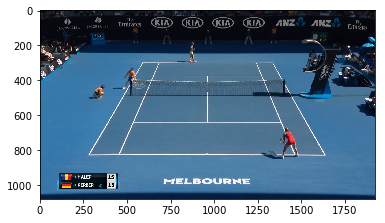

In [43]:
fig = plt.figure()
imgpath = '/home/mueller/code/python/Anwendungspraktikum/Videos/GoPro/GoProFrames/3_image_GP_00306.png'
img = plt.imread(imgpath)
plt.imshow(img)
plt.show()

In [93]:
cpreg[0:10]

array([  0.        ,  43.2530099 , 179.16083277,  80.6706256 ,
       176.47373937, 176.49409157, 150.81077597, 157.56347356,
       151.14899738, 168.20724348])

<IPython.core.display.Javascript object>


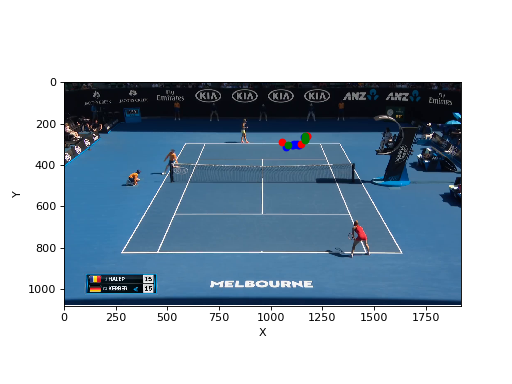

In [157]:
%matplotlib notebook

fig,ax = plt.subplots(1,1)
plt.imshow(img)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim(0,1920)
ax.set_ylim(0,1080)
scatter, = ax.plot([], [], 'bo')
cmap = ['b', 'r', 'g']
scatter = []
for c in cmap:
    scatter.append(ax.plot([], [], 'o', color=c))

def init():
    for scat in scatter:
        scat[0].set_data([],[])
    return scatter

def pltpos(i):
    i += 306
    np = 20
    vals = [k+i for k,x in enumerate(ballpos[i:i+np, 3]) if x > 0.03]
    blue = [k for k in vals if cpreg[k] == 0]
    red = [k for k in vals if cpreg[k] == 1]
    green = [k for k in vals if cpreg[k] == 2]
    x = ballpos[blue,1]
    y = ballpos[blue,2]
    x1 = ballpos[red, 1]
    y1 = ballpos[red, 2]
    x2 = ballpos[green, 1]
    y2 = ballpos[green, 2]
    xlist = [x, x1, x2]
    ylist = [y, y1, y2]
    for lnum, scat in enumerate(scatter):
        scat[0].set_data(xlist[lnum], ylist[lnum])
    return scatter

ani = animation.FuncAnimation(fig, pltpos, init_func=init, frames=20000, interval=200, blit=True)
plt.gca().invert_yaxis()
plt.show()

<IPython.core.display.Javascript object>


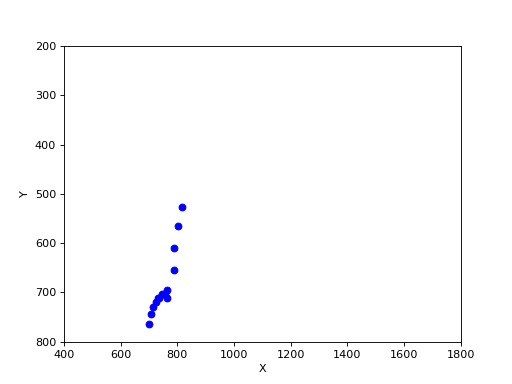

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation 

fig,ax = plt.subplots(1,1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim(400,1800)
ax.set_ylim(200,800)
#scatter, = ax.plot([], [], 'bo')
cmap = ['b', 'r']:
scatter = []
for c in cmap:
    scatter.append(ax.plot([], [], 'b', color=c)

def init():
    scatter.set_data([],[])
    return scatter,

def pltpos(i):
    i += 600
    nump = 15
    val = [k+i for k,x in enumerate(ballpos[i:i+nump, 3]) if x > 0.05]
    x = ballpos[val,1]
    y = ballpos[val,2]
    if cp[i] == 1:
        scatter.set_data(ballpos[i,1], ballpos[i,2])
    #    plt.scatter(row[1], row[2], c='r')
    scatter.set_data(x, y)
    time.sleep(0.5)
    return scatter, 

ani = matplotlib.animation.FuncAnimation(fig, pltpos, init_func=init, 
                                         frames=200, interval=200, blit=True)
plt.gca().invert_yaxis()
plt.show()

<IPython.core.display.Javascript object>


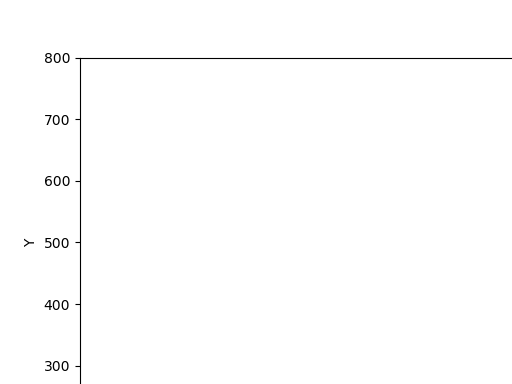

KeyboardInterrupt: 

In [23]:
%matplotlib notebook

def pltpos(ax, i, colors=['b']):
    ax.plot(ballpos[i,1], ballpos[i,2], c='b')
    fig.canvas.draw()

fig,ax = plt.subplots(1,1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim(600,900)
ax.set_ylim(200,800)
for i in range(600,605):
    pltpos(ax, i, ['b', 'r'])
    time.sleep(10)

/home/mueller/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
/home/mueller/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


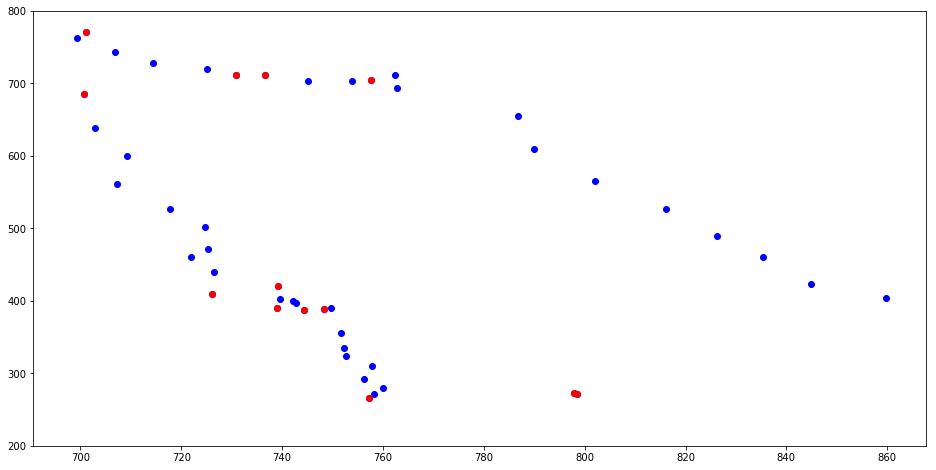

In [161]:
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
from IPython import display
#%matplotlib inline

fig = plt.figure(figsize=(16,8))
ax = fig.gca()
plt.xlim=(500,1000)
plt.ylim(200,800)
#ax1 = fig.add_subplot(1,1,1)
fig.show()

for i, row in enumerate(ballpos[600:650]):
    try:
        if row[3] > 0.05:
            plt.scatter(row[1], row[2], c='b')
            if cp[int(i+u)] == 1:
                plt.scatter(row[1], row[2], c='r')
            #display.clear_output(wait=True)
            #display.display(plt.gcf())
            fig.canvas.draw()
            time.sleep(1)
    except KeyboardInterrupt:
        break      

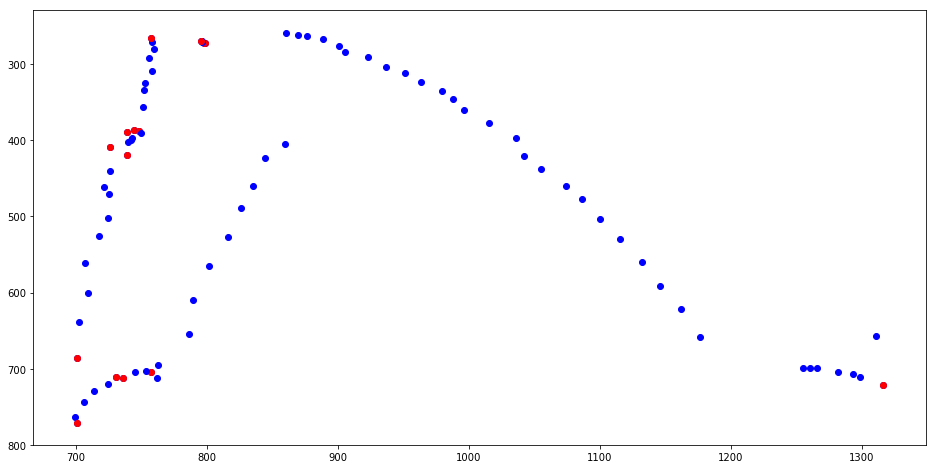

In [147]:
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1,1,1)
u, o = 600, 700
for i, row in enumerate(ballpos[u:o]):
    if row[3] > 0.05:
        plt.scatter(row[1], row[2], c='b')
        if cp[int(i+u)] == 1:
            plt.scatter(row[1], row[2], c='r')
plt.gca().invert_yaxis()
plt.show()